# 2.3 Linear Regression : feed from variable

    - Place holder의 사용법을 익힌다.
    

loss:4.8191175e-09
W:[-0.99997145] b:[0.999916] loss:4.7181885e-09
W:[-0.9999718] b:[0.99991703] loss:4.5981388e-09
W:[-0.9999721] b:[0.99991804] loss:4.4872515e-09
W:[-0.99997246] b:[0.999919] loss:4.382006e-09
W:[-0.99997276] b:[0.99991995] loss:4.274696e-09
W:[-0.9999731] b:[0.9999209] loss:4.171966e-09
W:[-0.9999734] b:[0.99992186] loss:4.078462e-09
W:[-0.9999737] b:[0.9999228] loss:3.9750176e-09
W:[-0.9999741] b:[0.9999237] loss:3.887738e-09
W:[-0.99997437] b:[0.9999246] loss:3.797684e-09
W:[-0.99997467] b:[0.9999255] loss:3.7019454e-09
W:[-0.99997497] b:[0.9999264] loss:3.6193377e-09
W:[-0.99997526] b:[0.9999273] loss:3.5324668e-09
W:[-0.99997556] b:[0.9999282] loss:3.4474148e-09
W:[-0.99997586] b:[0.999929] loss:3.3607108e-09
W:[-0.99997616] b:[0.99992985] loss:3.2878837e-09
W:[-0.99997646] b:[0.9999307] loss:3.203354e-09
W:[-0.9999767] b:[0.9999315] loss:3.1392489e-09
W:[-0.999977] b:[0.99993235] loss:3.0572416e-09
W:[-0.9999773] b:[0.9999332] loss:2.9878038e-09
W:[-0.9999776] 

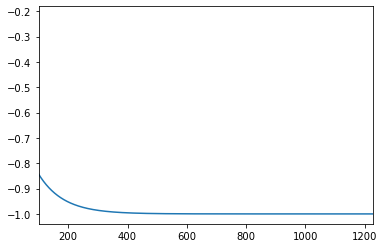

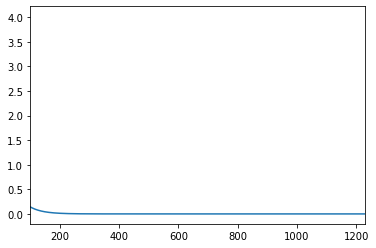

[ -2.999999  -4.999997  -6.999995  -8.999994 -10.999992  -2.      ]


In [15]:
# From https://tensorflow.org/get_started/get_started

import tensorflow as tf
import matplotlib.pyplot as plt

# Model parameters
W=tf.Variable([.3],tf.float32)
b=tf.Variable([-.3],tf.float32)

# Rank=1 and type = float32 인 place holder를 생성
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

W_arr=[]
b_arr=[]
loss_arr=[]

linear_model=x*W+b

#cost function/loss function
loss=tf.reduce_sum(tf.square(linear_model-y)) # sum of the squares

#optimizer
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)

#training data
x_train=[1,2,3,4]
y_train=[0,-1,-2,-3]

#training loop
init=tf.global_variables_initializer()
sess=tf.Session()

sess.run(init) #reset values to wrong

for i in range(1229):
    sess.run(train,{x:x_train,y:y_train})

    #evaluate training accuracy
    curr_W,curr_b,curr_loss=sess.run([W,b,loss],feed_dict={x:x_train,y:y_train})
    W_arr.append(curr_W)
    b_arr.append(curr_b)
    loss_arr.append(curr_loss)
    print("W:%s b:%s loss:%s"%(curr_W,curr_b,curr_loss))

plt.plot(range(len(W_arr)),W_arr,label='Weight')
plt.xlim(100,len(W_arr))
plt.show()

plt.plot(range(len(loss_arr)),loss_arr,label='Loss')
plt.xlim(100,len(W_arr))
plt.show()


# Testing model
# Predicted result is [-3,-5,-7,-9,-11,-2]
x_test=[4,6,8,10,12,3]
y_predict=x*W+b
print(sess.run(y_predict,feed_dict={x:x_test}))